In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import math
import firebase_admin
from firebase_admin import firestore

In [3]:
cred = firebase_admin.credentials.Certificate('./gramjam-7b408-firebase-adminsdk-z4za6-90b0b4291e.json')
app = firebase_admin.initialize_app(cred)

abandoned 208 / 265


<AxesSubplot:>

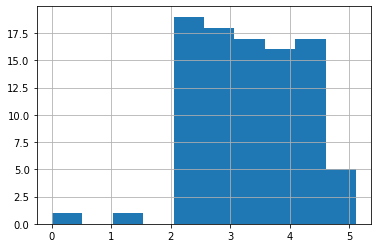

In [4]:
%matplotlib inline

db = firestore.client()

analytics = db.collection('analytics')

docs = analytics.stream()
df = pd.DataFrame(d.to_dict() for d in docs)

print('abandoned', df['abandoned'].count(), '/', len(df))

df['turns'][df['turns'] > 0].hist()


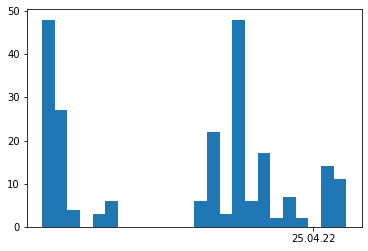

In [68]:
import matplotlib.dates as mdates

# convert the epoch format to matplotlib date format 
mpl_data = mdates.date2num(df['date'])

# plot it
fig, ax = plt.subplots(1,1)
ax.hist(mpl_data, bins=24)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()

In [64]:
df[df['abandoned'] != True].groupby(['userId'])['userId'].count()

userId
407bc321-593e-411d-9da5-88fe62063e38     3
6525dd88-cc1f-4443-bd14-2ee01cae011f     1
71a91938-359f-4ca0-bd00-f39e900a7730     1
72135c49-2c9b-415f-a825-b7178d939d2f     9
a044785d-3303-4f24-bb0f-dfe888a30a01     1
bd0e3be8-9bf9-460f-9bd7-bc75e784e7f4     1
d1a4869a-4521-4022-95bf-8a22c9fcff81     2
d622c4b9-3faf-4461-ba97-ad5f8c045c94    19
Name: userId, dtype: int64

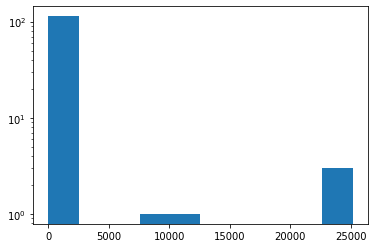

In [24]:
plt.hist(df['duration'], log=True)
plt.show()

In [31]:
feedback = db.collection('feedback')
for doc in feedback.stream():
    print(doc.to_dict())

{'userId': 'd622c4b9-3faf-4461-ba97-ad5f8c045c94', 'feedback': 'OMG I love your game!', 'date': DatetimeWithNanoseconds(2022, 4, 24, 1, 40, 39, 408000, tzinfo=datetime.timezone.utc)}
